## Base Imports and Tensorflow

In [1]:
import pandas as pd
import sys

%matplotlib inline

## Setup azure workspace for Data & Labels

In [2]:
#import for Azure data
from azureml.core import Dataset, Datastore, Workspace, Experiment, ComputeTarget
# import azureml.contrib.dataset
# from azureml.contrib.dataset import FileHandlingOption, LabeledDatasetTask
from azureml.core.authentication import InteractiveLoginAuthentication
import os
from pathlib import Path, PurePosixPath, PureWindowsPath

In [3]:
df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()

,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [4]:
# Set data directory to where images are
data_dir = '../datasets/animals'

In [5]:
# get file paths and labels from label df
file_paths_and_labels_df = df_lab

In [6]:
file_paths_and_labels_df.head()

,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [7]:
file_paths_and_labels_df.shape

(2850, 2)

In [8]:
# TODO SET RANDOM SEEDS

In [9]:
# Model Params

# Image height & width
img_height = 128
img_width = 128
img_depth = 3

IMG_SHAPE = (img_height, img_width, img_depth)


# initialize learning rate, batch size, and number of epochs
INIT_LR =  0.001
BATCH_SIZE = 32
NUM_EPOCHS = 2

# initialize the label names if needed
num_classes = 3


## Load Images

In [10]:
sys.path.insert(0, './helpers')

In [11]:
from image_loader import Train_generator



In [12]:
gen = Train_generator(img_height,
                      img_width,BATCH_SIZE,
                      data_dir)

In [13]:
gen_images = gen.image_load_csv(file_paths_and_labels_df)

Found 2280 validated image filenames belonging to 3 classes.
Found 570 validated image filenames belonging to 3 classes.


train


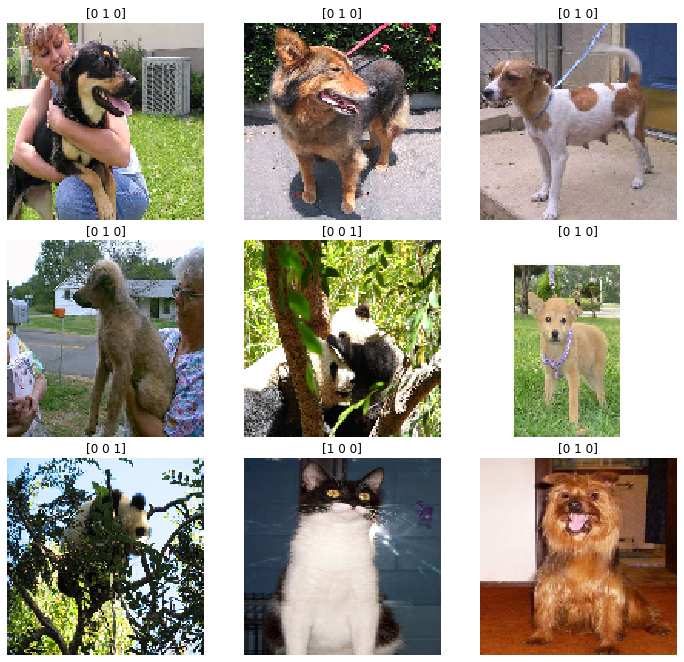

Valid


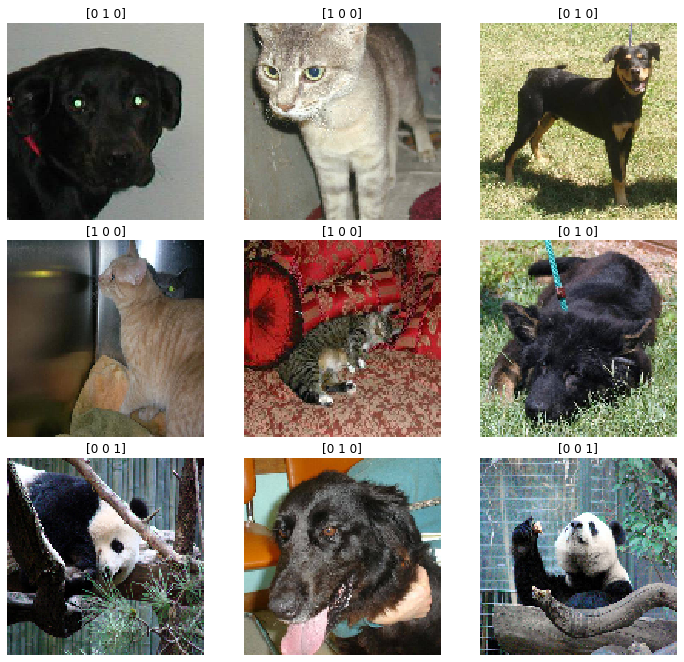

In [14]:
gen.image_check()

## Create Model

In [15]:
from model import Resnet

2.0.0


In [16]:
res = Resnet(num_classes,INIT_LR,NUM_EPOCHS,IMG_SHAPE)

[INFO] Initialize optimizer


In [17]:
train_data = gen.train_generator
val_data = gen.validation_generator

In [ ]:
H = res.train(BATCH_SIZE,
              NUM_EPOCHS,
              train_data,
              val_data)

Epoch 1/2
71/71 [==============================] - 53s 746ms/step - loss: 0.5985 - accuracy: 0.7429 - val_loss: 0.2859 - val_accuracy: 0.9062
Epoch 2/2
 5/71 [=>............................] - ETA: 42s - loss: 0.1543 - accuracy: 0.9750

In [ ]:
res.history(NUM_EPOCHS)

In [ ]:
# model.save('outputs/weights.hdf5')

In [ ]:
#plt.savefig('foo.png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
H.history

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()